In [ ]:
import pyclesperanto as cle
from skimage.io import imread, imsave
import numpy as np
import matplotlib

### What devices are available and selecting devices

In [ ]:
cle.list_available_devices()

In [ ]:
cle.info() #global information about the GPUs available

In [ ]:
# initialize GPU; use everytime
device = cle.select_device("NVIDIA") #If multiple types of GPUs were available, can select a specific one with a string (will match)
#cle.select_device(1, device_type="gpu") #Alt way of selecting the GPU
#print("Used GPU: ", device)

### Sending data to the GPU

#### Can create space to use on the GPU

In [ ]:
empty_array = cle.create((128,128), dtype=np.float32) #dtype can be specified if wanted (64-bit not supported)
empty_array #array of the specified shape and dtype but filled with 0

#### Sending existing data to the GPU (Push)

In [ ]:
#Array of random ints
array = np.random.random((128,128)).astype(np.float32)
print(type(array), array.shape, array.dtype)

In [ ]:
random_array = cle.push(array)
random_array #calling the array makes a super awesome visual automatically!

#### Pull data off GPU

In [ ]:
read_array = cle.pull(random_array)
print(type(read_array), read_array.shape, read_array.dtype)

# Processing Data on GPU

#### Simple Processing (Crops, flips, pasting)

In [ ]:
image = cle.push(imread('https://samples.fiji.sc/blobs.png').squeeze())
image

In [ ]:
help(cle.crop) #get help for a command

##### Cropping a 75x75 area at (10,10)

In [ ]:
width, height = 75, 75
x, y = 10, 10
tile = cle.crop(image, start_x=x, start_y=y, width=width, height=height)
tile

##### Pasting the cropped data into a new array

In [ ]:
collage = cle.create((width*2+6, height*2+6), dtype=tile.dtype)
collage.fill(255) #fills array with a 'white' background
collage

In [ ]:
help(cle.paste)

In [ ]:
cle.paste(tile, collage, 2, 2) 
#Repeating this function with different values pastes the data 
#into the previous result i.e., the empty collage is not remade

In [ ]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flipped_tile, collage, width+4, 2)
collage

In [ ]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flipped_tile, collage, width+4, height+4)
collage

In [ ]:
flipped_tile = cle.flip(tile, flip_x=False, flip_y=True)
cle.paste(flipped_tile, collage, 2, height+4)
collage

In [51]:
read_array = cle.pull(collage)
read_array = cle.pull(flipped_tile)
read_array = cle.pull(image)
read_array = cle.pull(tile)

### Math Operations

In [52]:
import pyclesperanto as cle
import numpy as np

cle.get_device() # default device initialisation

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              572.83
	Device Type:                 GPU
	Compute Units:               48
	Global Memory Size:          16375 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4093 MB
	Max Clock Frequency:         1560 MHz
	Image Support:               Yes

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32, mtype=buffer)
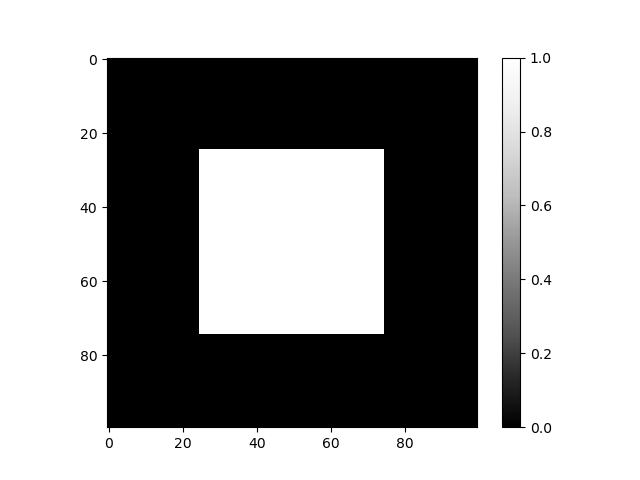
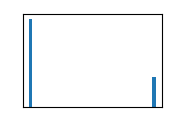

In [53]:
arr = np.zeros((100,100))
arr[25:75, 25:75] = 1
gpu_arr = cle.push(arr)
gpu_arr

#### Logical functions:
- array > x (cle.greater_constant)
- array >= x (cle.greater_or_equal_constant)
- array < x (cle.smaller_constant)
- array <= x (cle.smaller_or_equal_constant)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
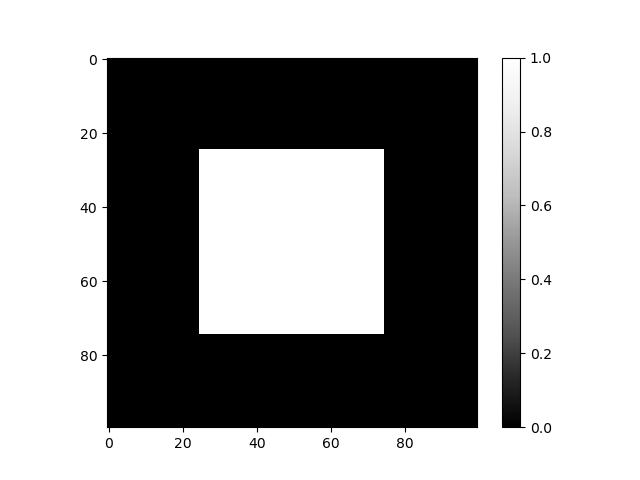
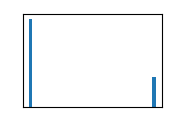

In [54]:
binary_arr = (gpu_arr == 1)
binary_arr

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8, mtype=buffer)
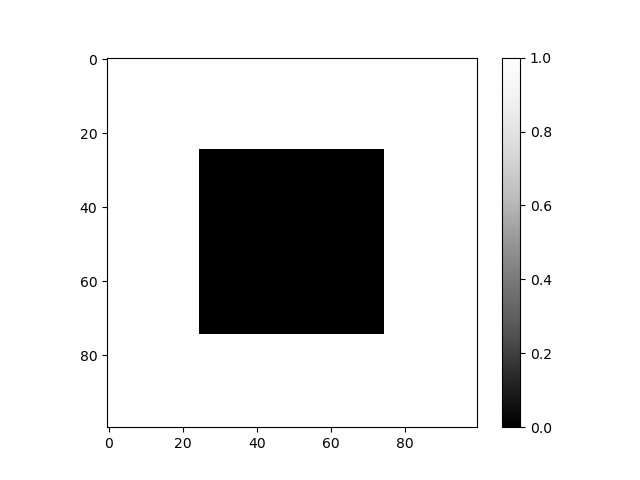
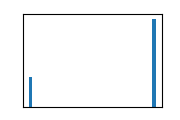

In [55]:
another_binary_image = (binary_arr == 0)
another_binary_image

#### Scalar functions:
- array * x (cle.multiply_image_and_scalar)
- array / x (cle.divide_scalar_by_image)
- array + x (cle.add_image_and_scalar)
- array - x (cle.subtract_image_from_scalar)

array([[12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       ...,
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12],
       [12, 12, 12, ..., 12, 12, 12]], dtype=uint8, mtype=buffer)
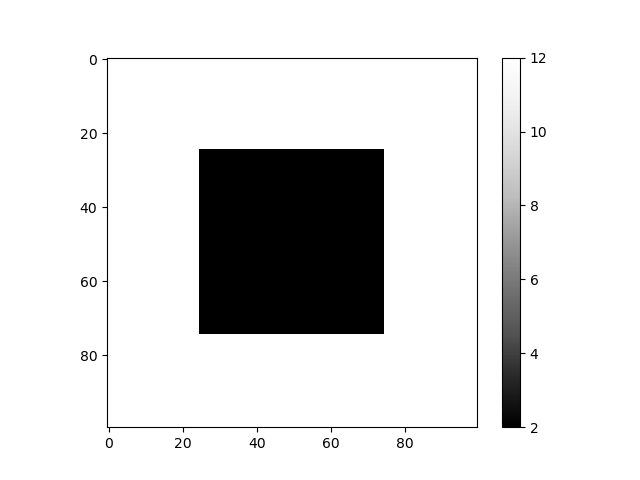
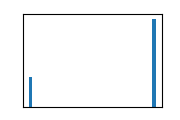

In [58]:
grayscal_image = (another_binary_image*50+10)/5
grayscal_image

#### Operations with Arrays
- arr * array (cle.multiply_images)
- arr - array (cle.subtract_images)
- arr / array (cle.divide_images)
- arr + array (cle.add_images)
- arr > array (cle.greater)
- arr >= array (cle.greater_or_equal)
- arr < array (cle.smaller)
- arr <= array (cle.smaller_or_equal)
- arr == array (cle.equal)

Note on optimization: For better memory management and speed optimization, it is recommended to rely on function (e.g. cle.multiply_images, etc.) instead of the operators if resources are limtied.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
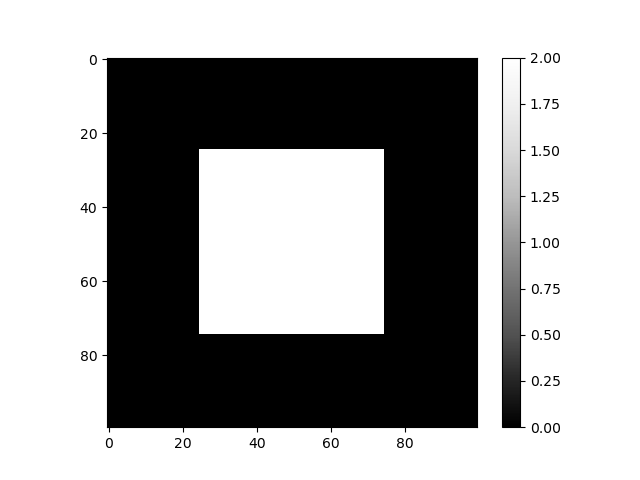
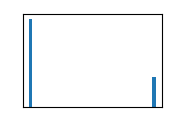

In [59]:
multiplied_array = grayscal_image * binary_arr
multiplied_array

array([[12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       ...,
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.],
       [12., 12., 12., ..., 12., 12., 12.]], dtype=float32, mtype=buffer)
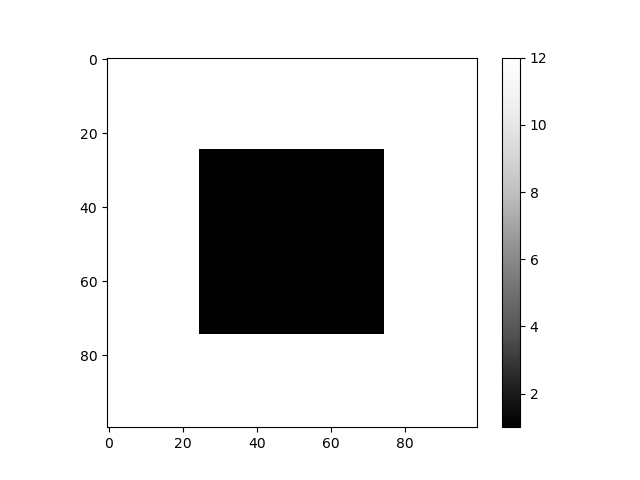
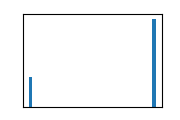

In [60]:
subtracted_array = grayscal_image - binary_arr
subtracted_array

## Matrix Multiplication

In [62]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

cle.select_device('NVIDIA') # default initialization

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              572.83
	Device Type:                 GPU
	Compute Units:               48
	Global Memory Size:          16375 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4093 MB
	Max Clock Frequency:         1560 MHz
	Image Support:               Yes

In [63]:
array1 = np.asarray([1, 2, 3, 4, 5])
array2 = np.asarray([6, 7, 8, 9, 10])

vector1 = cle.push(array1)
vector2 = cle.push(array2)

**In order to multiplicate matrices, the input matrices must be of size (n * m) and (m * n)**
Therefore, we transpose one of our vectors:

In [64]:
vector1_t = cle.transpose_xy(vector1)

print("Vector 1 (transposed): " + str(vector1_t))
print("Vector 2: " + str(vector2))

Vector 1 (transposed): [[1]
 [2]
 [3]
 [4]
 [5]]
Vector 2: [ 6  7  8  9 10]


In [65]:
matrix = cle.multiply_matrix(vector1_t, vector2)

print(matrix)

[[ 6.  7.  8.  9. 10.]
 [12. 14. 16. 18. 20.]
 [18. 21. 24. 27. 30.]
 [24. 28. 32. 36. 40.]
 [30. 35. 40. 45. 50.]]


C:\ProgramData\anaconda3\envs\cle\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


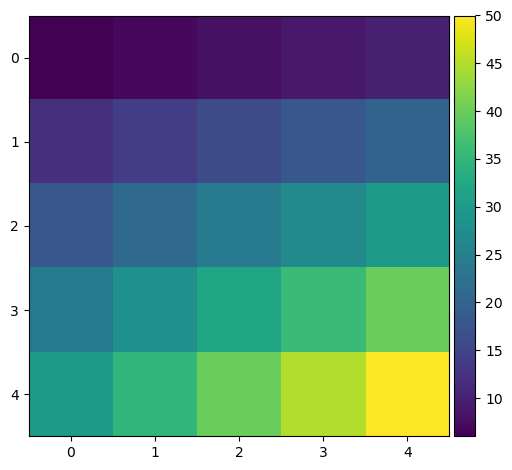

In [66]:
imshow(matrix)

[[ 0.41473538  3.6062353   2.5677967   0.06447735  0.7195655 ]
 [ 8.924708   10.089663    5.4481134   8.124495   16.147964  ]
 [ 0.43985695  2.7657988   2.5112038   6.4456296  28.469168  ]
 [14.824368   27.542568    7.7397633  32.884617    6.761094  ]
 [11.323717   18.623734    6.127417   40.072937   20.90673   ]]


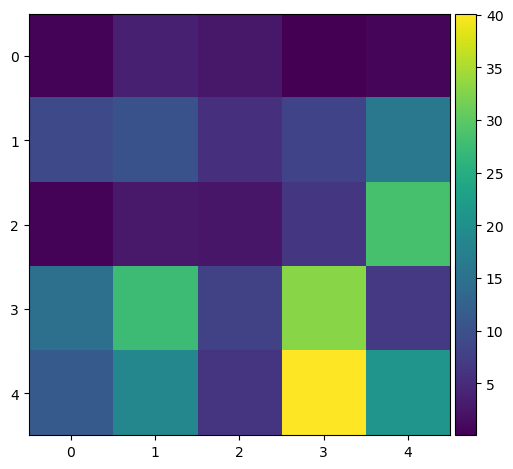

In [67]:
# generate another matrix of the same size with random values
another_matrix = cle.push(np.random.random(matrix.shape))

# element by element multiplication
matrix_element_wise_multiplied = cle.multiply_images(matrix, another_matrix)

print(matrix_element_wise_multiplied)

imshow(matrix_element_wise_multiplied)

In [68]:
elements_times_2 = cle.multiply_image_and_scalar(matrix, scalar=2)
print(elements_times_2)

[[ 12.  14.  16.  18.  20.]
 [ 24.  28.  32.  36.  40.]
 [ 36.  42.  48.  54.  60.]
 [ 48.  56.  64.  72.  80.]
 [ 60.  70.  80.  90. 100.]]


### 3D Vector and Matrices operations
When dealing with three dimensional point coordinates, it is mandatory to take the voxel size into account, e.g. for measuring distances between points. This example shows how to multiply a ***list of coordinates*** by a given voxel size.

In [69]:
voxel_size = np.asarray([[0.2], [0.2], [0.5]])
gpu_voxel_size = cle.push(voxel_size)

print(f"Array shape: {voxel_size.shape}")
print(f"GPU array shape: {gpu_voxel_size.shape}")

Array shape: (3, 1)
GPU array shape: (3, 1)


In [70]:
pointlist = np.asarray(
    [
        [1, 3,  5, 11], # X
        [0, 6,  1, 2 ], # Y
        [9, 11, 6, 2 ]  # Z
    ]
)
gpu_pointlist = cle.push(pointlist)

print(f"Array shape: {pointlist.shape}")
print(f"GPU array shape: {gpu_pointlist.shape}")

Array shape: (3, 4)
GPU array shape: (3, 4)


In [71]:
print(gpu_voxel_size)

[[0.2]
 [0.2]
 [0.5]]


In [72]:
print(gpu_pointlist)

[[ 1  3  5 11]
 [ 0  6  1  2]
 [ 9 11  6  2]]


In [73]:
gpu_updated_pointlist = cle.multiply_images(gpu_pointlist, gpu_voxel_size)
#similar to scaling the image
print(gpu_updated_pointlist)

[[0 0 1 2]
 [0 1 0 0]
 [4 5 3 1]]


## Inspecting 3D Images

In [74]:
import pyclesperanto as cle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Helper function for reading ImageJs ZIP file examples
import requests
import zipfile
from io import BytesIO
from skimage.io import imread, imshow
from tifffile import imread

def remote_reader(url):
    """generator that returns the first numpy arrays representing 
    in a tif in a remote zip."""
    response = requests.get(url)
    response.raise_for_status()
    with zipfile.ZipFile(BytesIO(response.content)) as zf:
        for path in zf.filelist:
            with zf.open(path, "r") as f:
                # f is a file-like object of type zipfile.ZipExtFile
                # replace imread with any file-reader of your choice
                # that accepts a file-like object as input 
                return imread(f)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16, mtype=buffer)
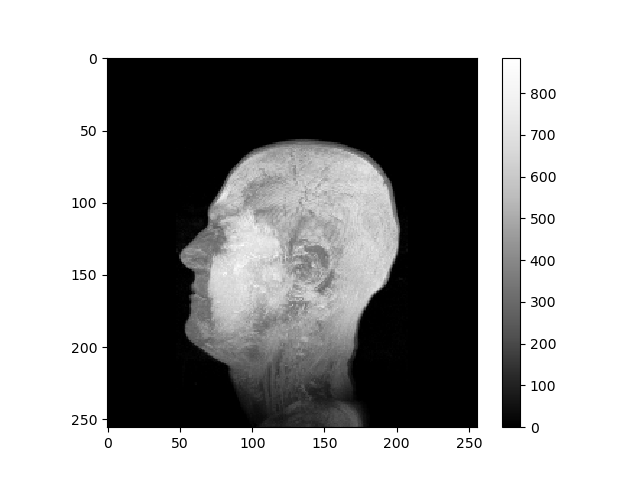
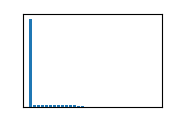

In [79]:
# Load example data from fiji website
input_image = cle.asarray(remote_reader('https://imagej.net/images//t1-head.zip'))
input_image #appears to default to displaying as max projection

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16, mtype=buffer)
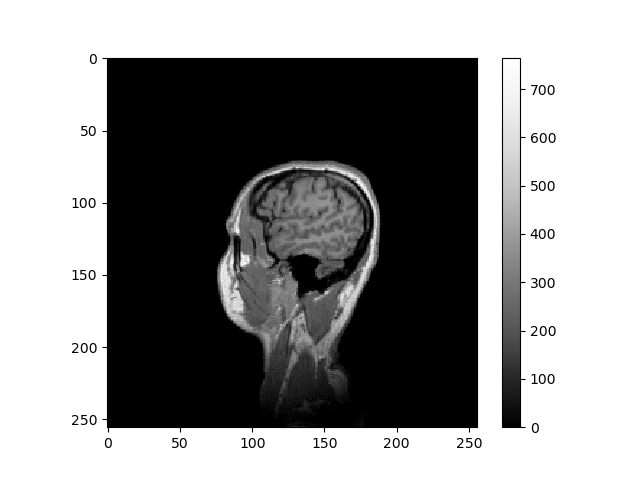
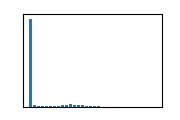

In [78]:
#Look at a slice
image_slice = input_image[100]
image_slice

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16, mtype=buffer)
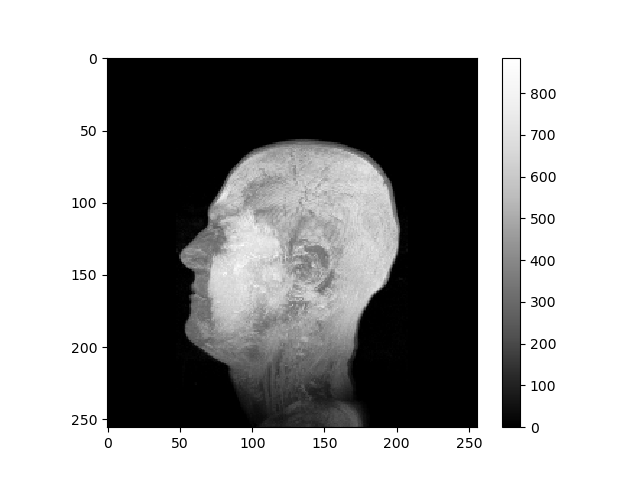
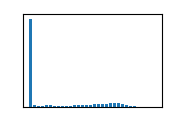

In [80]:
# Maximum Z Projection
projection = cle.maximum_z_projection(input_image)

# show result
projection

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32, mtype=buffer)
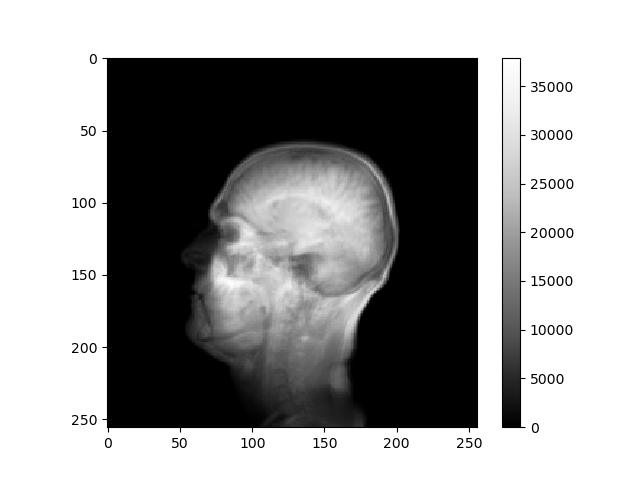
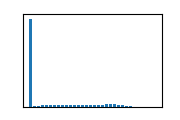

In [81]:
# Sum Z Projection
projection = cle.sum_z_projection(input_image)

# show result
projection

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16, mtype=buffer)
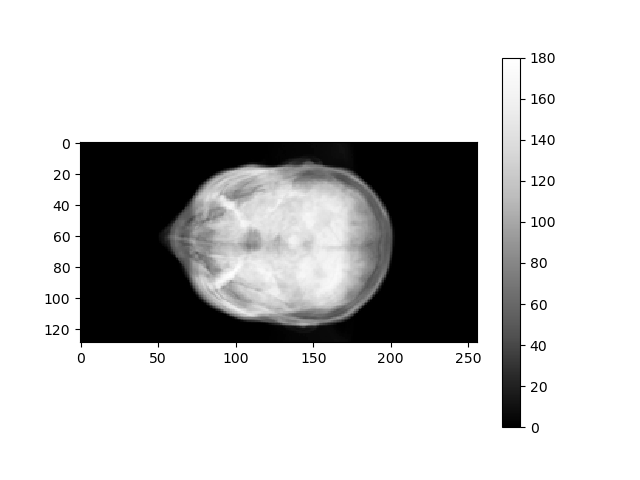
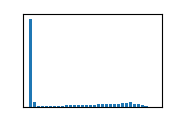

In [82]:
# Mean Y Projection
projection = cle.mean_y_projection(input_image)

# show result
projection

### Transposing

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32, mtype=buffer)
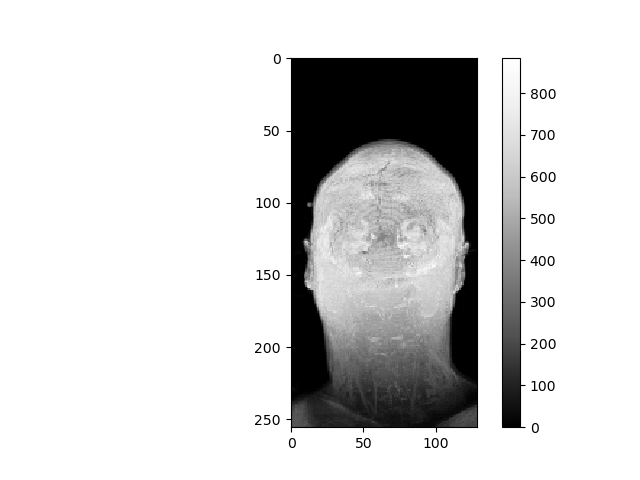
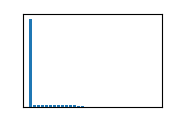

In [88]:
# Transpose X against Z
transposed_image = cle.create([256, 256, 129]);
cle.transpose_xz(input_image, transposed_image) #input of the image and the empty array to place transposed data

# show result
# fig1 = plt.figure()
# imshow(transposed_image[126])
# fig2 = plt.figure()
# imshow(transposed_image[98])
# plt.show()

transposed_image

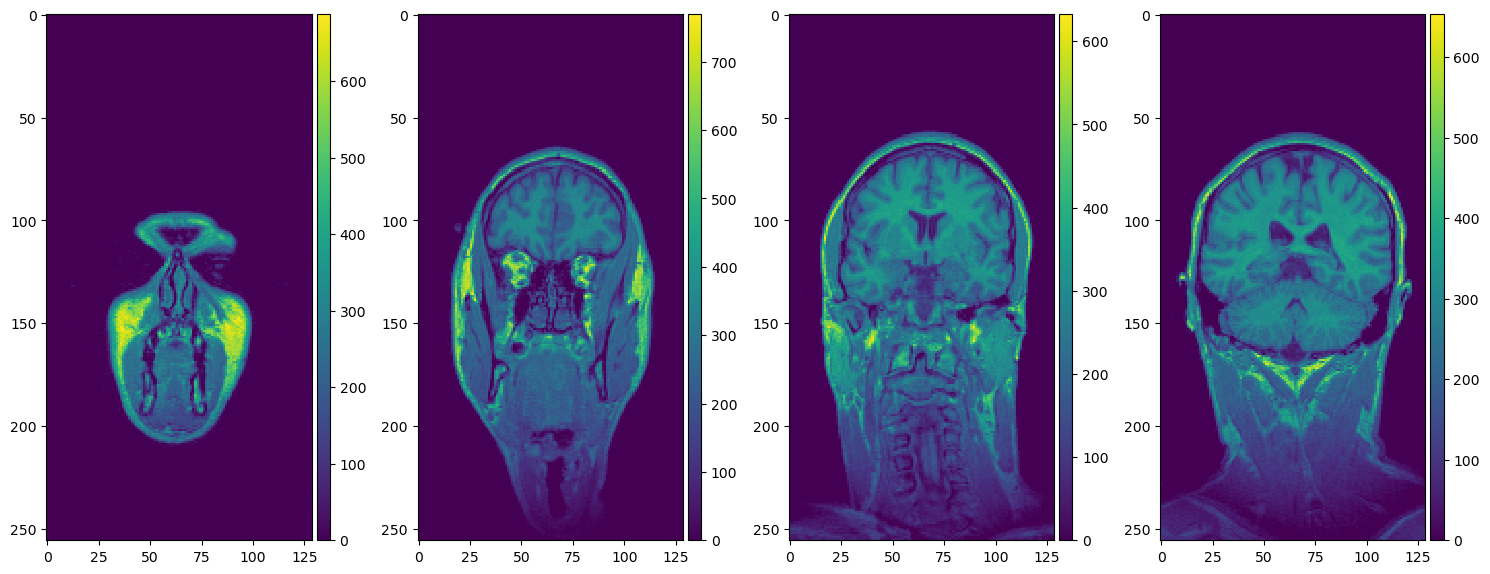

In [84]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))
imshow(transposed_image[75], ax=axs[0])
imshow(transposed_image[100], ax=axs[1])
imshow(transposed_image[125], ax=axs[2])
imshow(transposed_image[150], ax=axs[3])

## Blob Segmentation and Analysis Example

In [1]:
import pyclesperanto as cle
import numpy as np
import pandas as pd

from skimage import io
from matplotlib import pyplot as plt

In [2]:
# load data
image = io.imread('https://samples.fiji.sc/blobs.png').squeeze()
print("Image size: ", image.shape)

Image size:  (254, 256)


Order of operations:
1. Denoise
2. Threshold
3. Connected component labeling

array([[ 41.428753,  34.696438,  27.733936, ..., 220.92714 , 211.21164 ,
        206.7157  ],
       [ 47.421425,  38.878723,  30.323011, ..., 228.32323 , 220.60194 ,
        216.83534 ],
       [ 48.121437,  40.610855,  33.357384, ..., 235.32935 , 229.7049  ,
        226.88821 ],
       ...,
       [ 74.4386  ,  76.32904 ,  77.03725 , ...,  48.000324,  48.00075 ,
         48.001015],
       [ 81.793655,  81.17788 ,  79.80762 , ...,  48.000004,  48.000004,
         48.000004],
       [ 88.81693 ,  85.3821  ,  81.4788  , ...,  48.000004,  48.000004,
         48.000004]], dtype=float32, mtype=buffer)
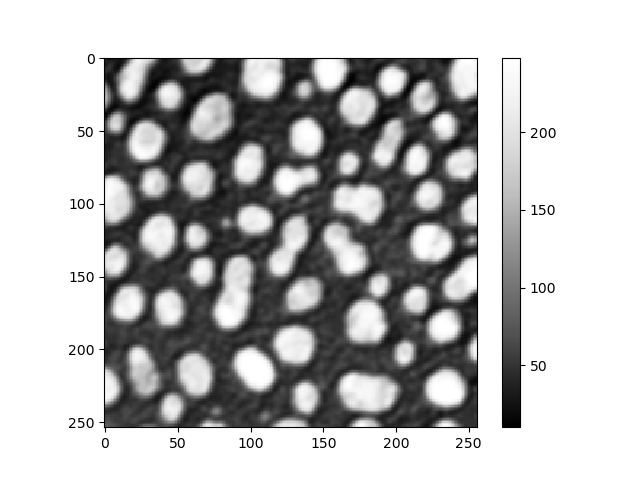
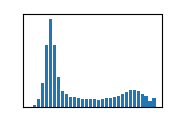

In [3]:
blurred = cle.gaussian_blur(image, sigma_x=1, sigma_y=1)
blurred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8, mtype=buffer)
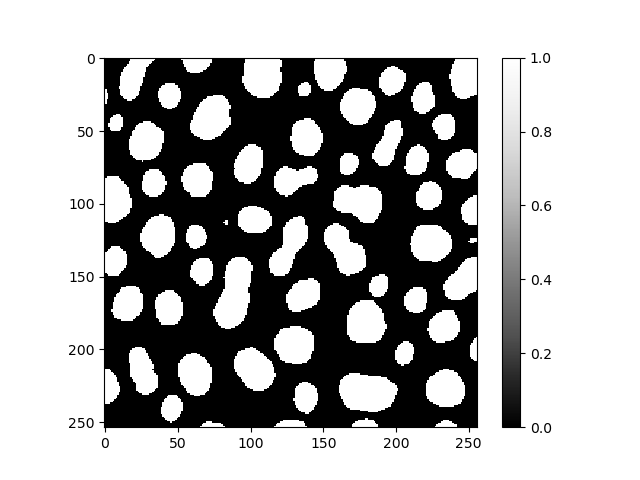
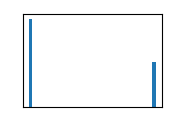

In [4]:
binary = cle.threshold_otsu(blurred)
binary

array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32, mtype=buffer)
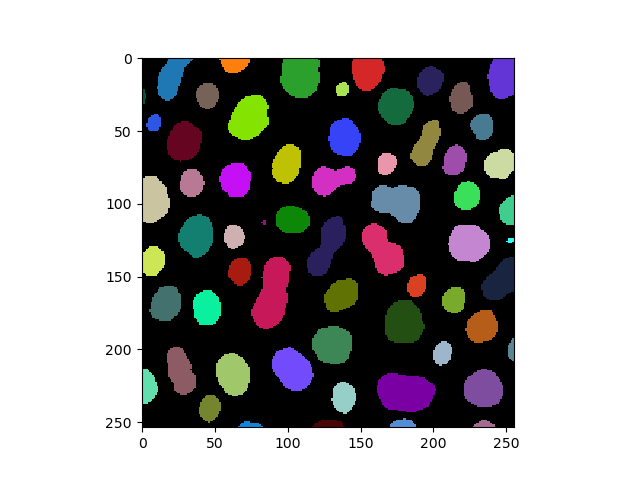

In [5]:
labeled = cle.connected_components_labeling(binary)
labeled

In [6]:
# The maximium intensity in a label image corresponds to the number of objects
num_labels = cle.maximum_of_all_pixels(labeled)
print("Number of objects in the image: " + str(num_labels))

Number of objects in the image: 62.0


Remove objects touching the boarder

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32, mtype=buffer)
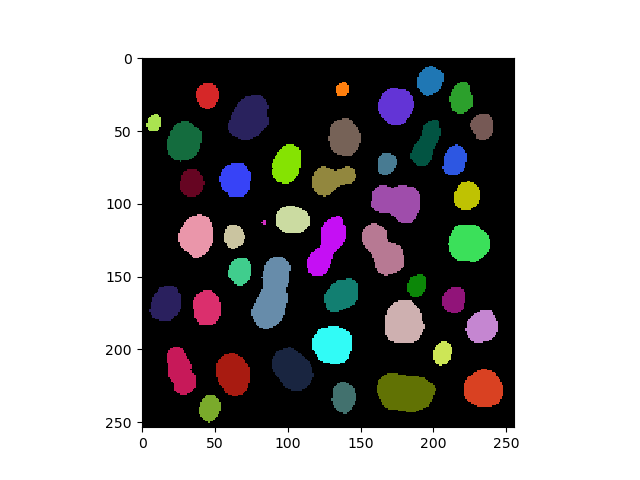

In [7]:
# Exclude Labels On Edges
labels_excl_edges = cle.exclude_labels_on_edges(labeled)
labels_excl_edges

In [8]:
#get datafram of statistics like pixel values
df = pd.DataFrame(
    cle.statistics_of_labelled_pixels(image, labels_excl_edges)
    )
df.head()

,sum_z,label,sum_intensity_times_z,bbox_min_x,bbox_min_y,sum_intensity_times_x,bbox_depth,bbox_min_z,bbox_max_x,bbox_max_y,...,centroid_z,sum_distance_to_centroid,mean_distance_to_centroid,sum_distance_to_mass_center,mean_distance_to_mass_center,standard_deviation_intensity,max_distance_to_centroid,max_distance_to_mass_center,mean_max_distance_to_centroid_ratio,mean_max_distance_to_mass_center_ratio
0,0.0,1.0,0.0,0.0,0.0,11361200.0,1.0,0.0,0.0,0.0,...,0.0,1772.119019,6.328997,1772.118896,6.328996,35.359333,0.000000,0.000000,0.000000,0.000000
1,0.0,2.0,0.0,0.0,0.0,1687536.0,3556.0,0.0,3555.0,3555.0,...,0.0,244.934540,3.265794,244.943207,3.265909,17.544641,114.138229,114.138229,34.949612,34.948376
2,0.0,3.0,0.0,0.0,0.0,10430904.0,1234.0,0.0,1233.0,1233.0,...,0.0,1722.543701,6.356250,1722.689575,6.356788,24.597654,29.816837,29.816837,4.690948,4.690551
3,0.0,4.0,0.0,0.0,0.0,1915200.0,3497.0,0.0,3496.0,3496.0,...,0.0,1291.810181,5.690794,1292.157349,5.692323,29.717802,102.963196,102.963196,18.092941,18.088079
4,0.0,5.0,0.0,0.0,0.0,16318632.0,713.0,0.0,712.0,712.0,...,0.0,4140.302246,8.381179,4140.644043,8.381870,24.566525,89.557388,89.557388,10.685536,10.684654


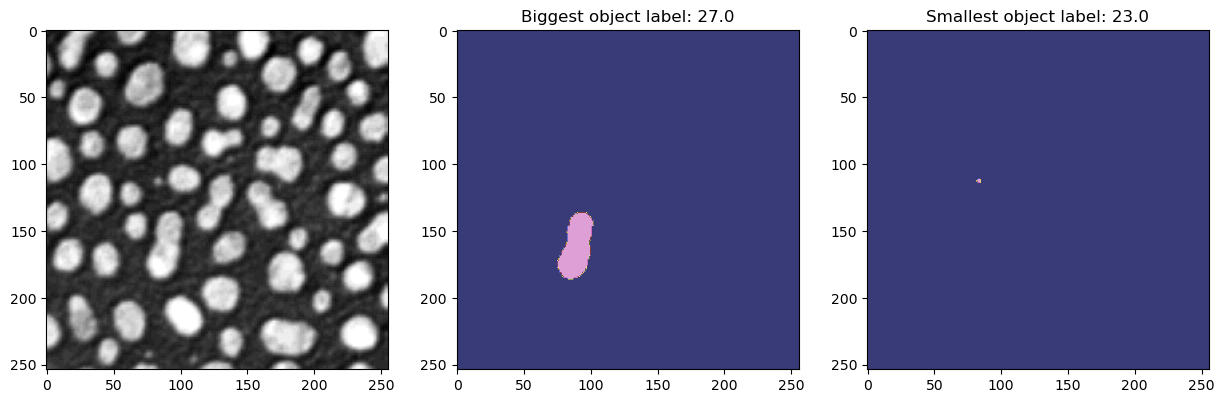

In [10]:
# get the label with the largest area from the df 
largest_label = df.loc[df['area'].idxmax()]['label']
smalest_label = df.loc[df['area'].idxmin()]['label']

biggest = cle.equal_constant(labels_excl_edges, scalar=largest_label)
smallest = cle.equal_constant(labels_excl_edges, scalar=smalest_label)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[1].imshow(biggest, cmap='tab20b')
axs[1].set_title('Biggest object label: ' + str(largest_label))
axs[2].imshow(smallest, cmap='tab20b')
axs[2].set_title('Smallest object label: ' + str(smalest_label))
plt.show()

Important to note that GPU cannot calculate all types of measurements

Compare scikit-image library to cle library

## Voroni-Otsu-labeling

In [14]:
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
import numpy as np

input_image = imread("E:/ParadaKusz_Lab/OIC-136_Microglia/IXMtest_A02_s9.tif")


In [20]:
# define an interesting sub-region
bb_x=250
bb_y=0
bb_width=200
bb_height=200

In [2]:
import pyclesperanto as cle

# select a specific OpenCL / GPU device and see which one was chosen
cle.select_device('NVIDIA')

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              572.83
	Device Type:                 GPU
	Compute Units:               48
	Global Memory Size:          16375 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         4093 MB
	Max Clock Frequency:         1560 MHz
	Image Support:               Yes

In [7]:
pull1=cle.pull(flip)
pull2=cle.pull(input_image)
pull3=cle.pull(input_gpu)
pull4=cle.pull(input_crop)

array([[147, 137, 138, ..., 133, 138, 135],
       [149, 139, 139, ..., 128, 133, 134],
       [149, 145, 149, ..., 131, 142, 138],
       ...,
       [142, 141, 150, ..., 156, 160, 152],
       [146, 150, 153, ..., 153, 152, 158],
       [149, 150, 151, ..., 162, 156, 154]], dtype=uint16, mtype=buffer)
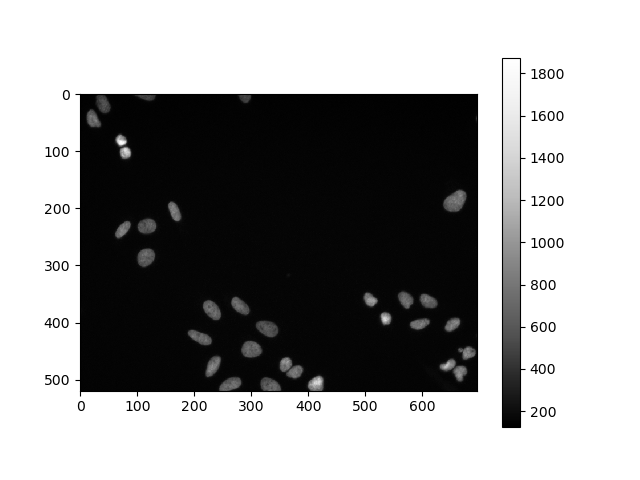
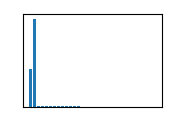

In [8]:
input_gpu = cle.push(input_image)
input_gpu

In [12]:
help(cle.flip)

Help on function flip in module pyclesperanto:

flip(input_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array], output_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array, NoneType] = None, flip_x: bool = True, flip_y: bool = True, flip_z: bool = True, device: Optional[pyclesperanto._pyclesperanto._Device] = None) -> Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array]
    Flips an image in X, Y and/or Z direction depending on boolean flags.
    
    Parameters
    ----------
    input_image: Image
        Input image to process.
    output_image: Optional[Image] (= None)
        Output result image.
    flip_x: bool (= True)
        Flip along the x axis if true.
    flip_y: bool (= True)
        Flip along the y axis if true.
    flip_z: bool (= True)
        Flip along the z axis if true.
    device: Optional[Device] (= None)
        Device to perform the operation on.
    
    Returns
    -------
    Image
    
    References
    ----------
    [1] htt

array([[154, 156, 162, ..., 151, 150, 149],
       [158, 152, 153, ..., 153, 150, 146],
       [152, 160, 156, ..., 150, 141, 142],
       ...,
       [138, 142, 131, ..., 149, 145, 149],
       [134, 133, 128, ..., 139, 139, 149],
       [135, 138, 133, ..., 138, 137, 147]], dtype=uint16, mtype=buffer)
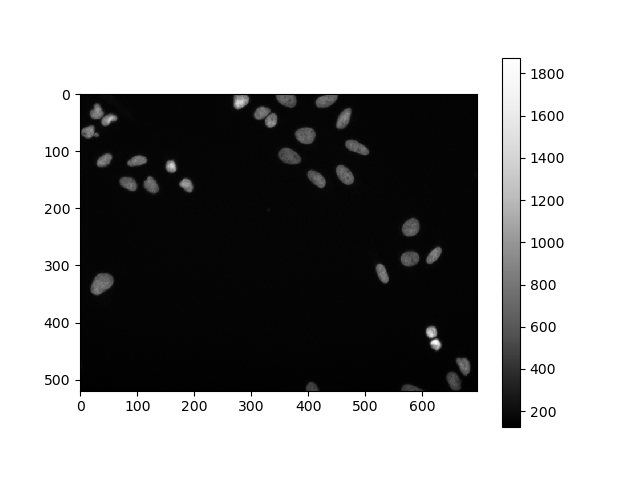
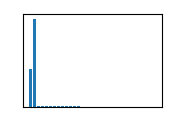

In [18]:
flip = cle.create((input_gpu.shape),dtype=input_gpu.dtype)
flipped_img = cle.flip(input_gpu, flip_x = True, flip_y = True)
cle.paste(flipped_img, flip)

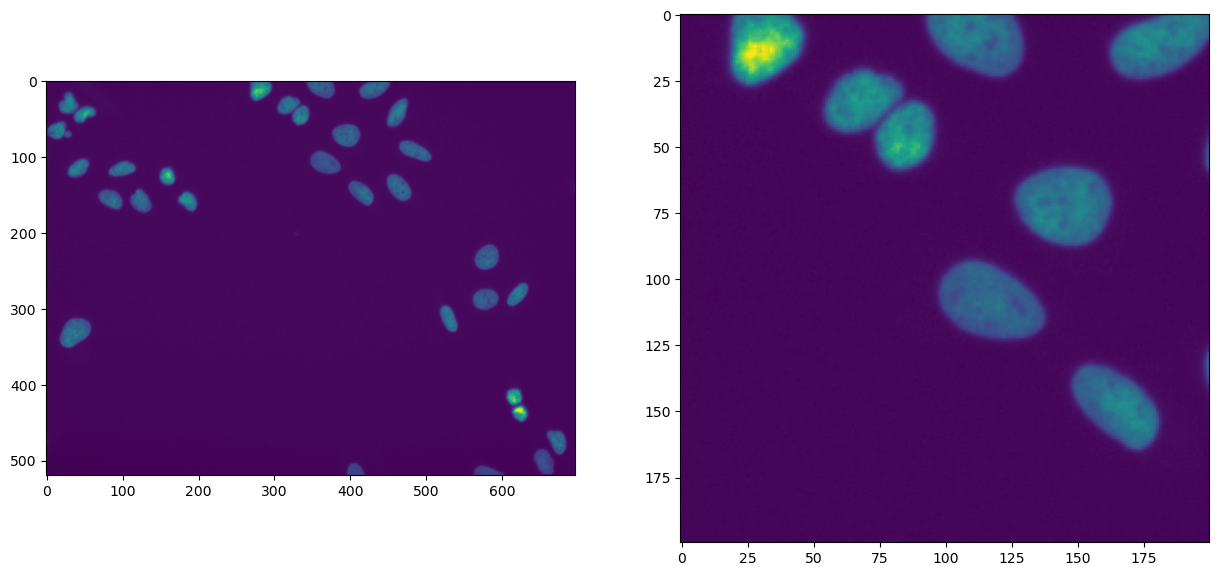

In [21]:
#Image was read in differently than what was shown in the tutorial, had to flip the image to match better.
#possible bug: flip gives the same results regardless of the axises specified
input_crop = cle.crop(flip, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(flip)
axs[1].imshow(input_crop)
plt.show()

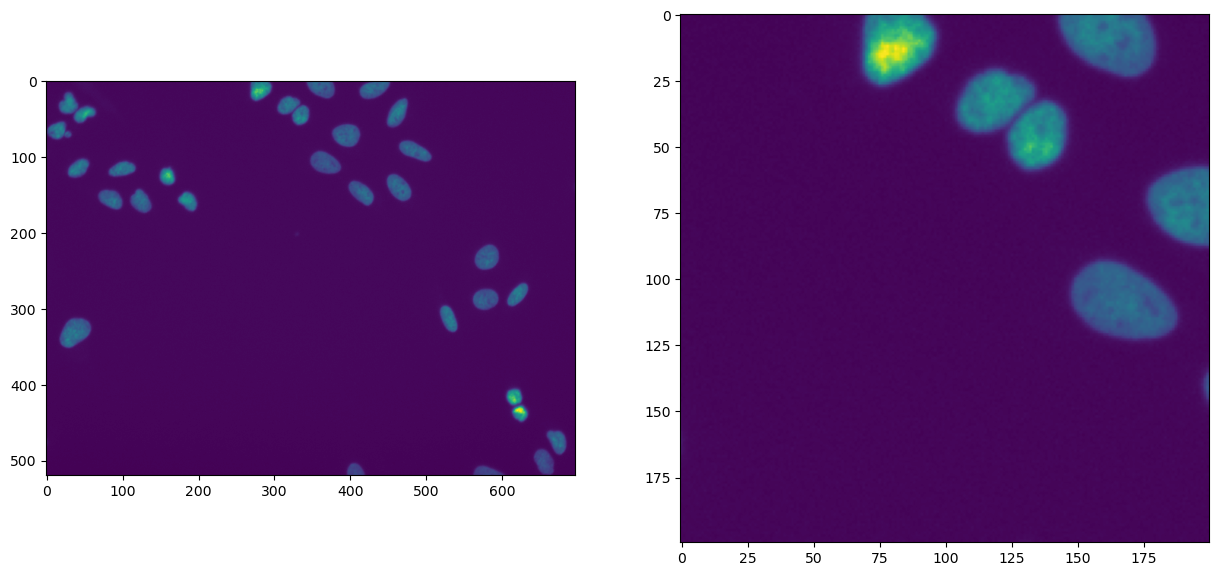

In [17]:
#Image was read in differently than what was shown in the tutorial, had to flip the image to match better.
input_crop = cle.crop(flip, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(flip)
axs[1].imshow(input_crop)
plt.show()

### Applying the algorithm
Voronoi-Otsu-labeling is a command in clesperanto, which asks for two sigma parameters. The first sigma controls how close detected cells can be (`spot_sigma`) and second controls how precise segmented objects are outlined (`outline_sigma`).

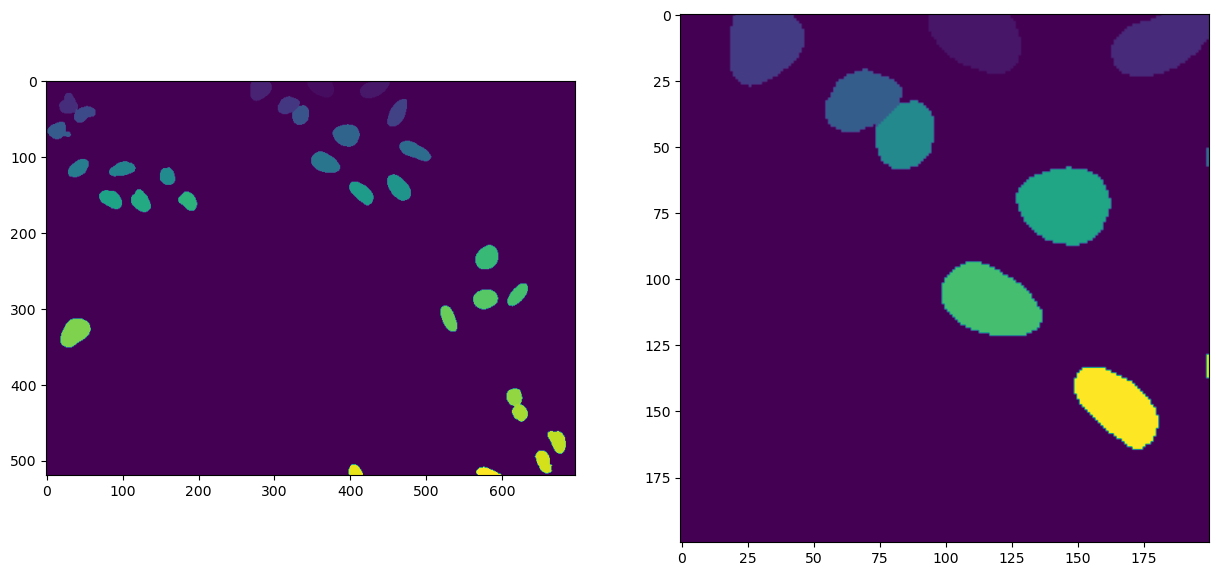

In [23]:
sigma_spot_detection = 5
sigma_outline = 1

segmented = cle.voronoi_otsu_labeling(flip, spot_sigma=sigma_spot_detection, outline_sigma=sigma_outline)
segmented_crop = cle.crop(segmented, start_x=bb_x, start_y=bb_y, width=bb_width, height=bb_height)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(segmented)
axs[1].imshow(segmented_crop)
plt.show()

#### How it works
The Voronoi-Otsu-Labeling workflow is a combination of Gaussian blur, spot detection, thresholding and binary watershed. 

For demonstration purposes we do that only on the 2D cropped image shown above. If this algorithm is applied to 3D data, it is recommended to make it isotropic first.

In [24]:
image_to_segment = input_crop

As a first step, we blur the image with a given sigma and detect maxima in the resulting image.

number of detected spots 41.0


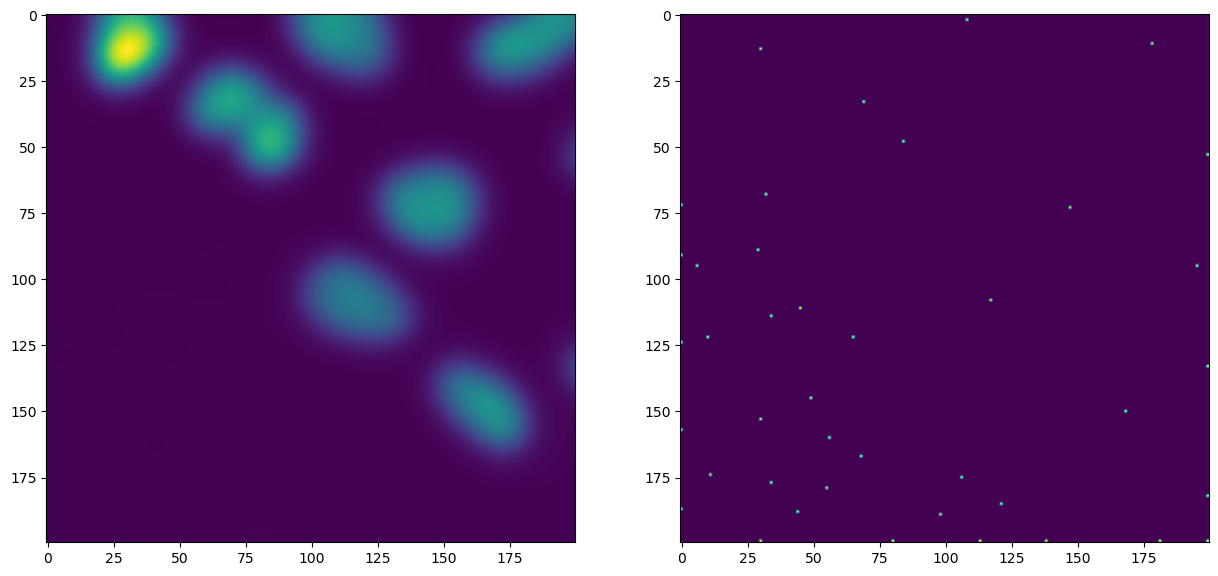

In [27]:
blurred = cle.gaussian_blur(image_to_segment, sigma_x=sigma_spot_detection, sigma_y=sigma_spot_detection, sigma_z=sigma_spot_detection)
#enough of a blue to remove most of the texture of the objects wihle retaining their presence

detected_spots = cle.detect_maxima_box(blurred, radius_x=0, radius_y=0, radius_z=0)

number_of_spots = cle.sum_of_all_pixels(detected_spots)
print("number of detected spots", number_of_spots)

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(blurred)
axs[1].imshow(detected_spots)
plt.show()

Furthermore, we start again from the cropped image and blur it again, with a different sigma. Afterwards, we threshold the image using Otsu's thresholding method (Otsu et al 1979).

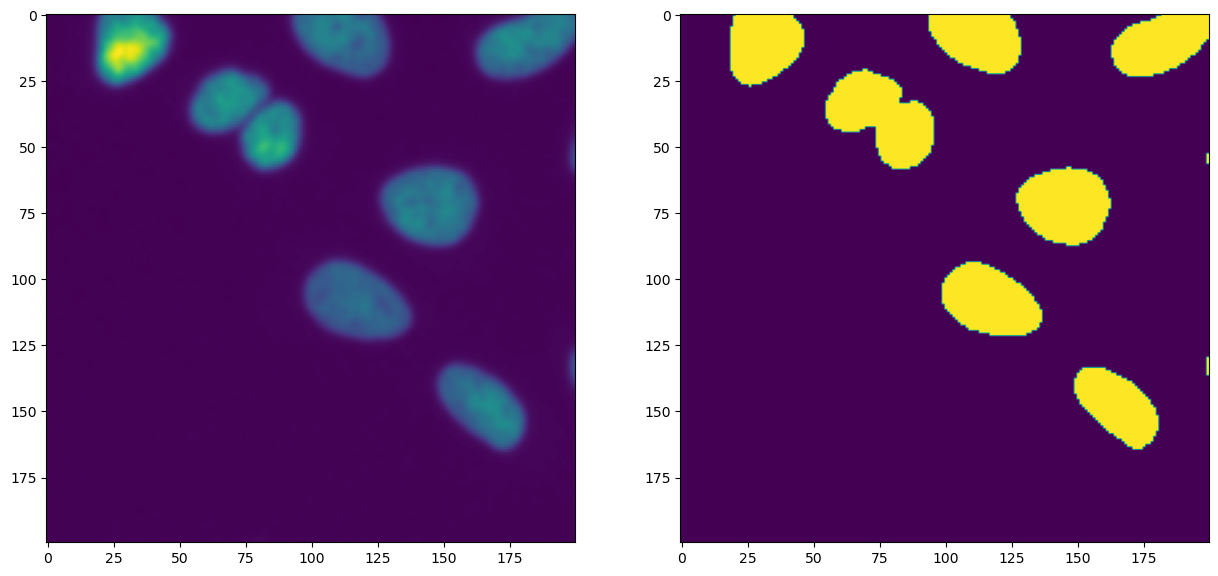

In [28]:
blurred = cle.gaussian_blur(image_to_segment, sigma_x=sigma_outline, sigma_y=sigma_outline, sigma_z=sigma_outline)
#Smaller blue to make threhsolding easier and maintain reasonable boundaries

binary = cle.threshold_otsu(blurred)


fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(blurred)
axs[1].imshow(binary)
plt.show()

Afterwards, we take the binary spots image and the binary segmentation image and apply a binary_and operation to exclude spots which were detected in the background area. Those likely corresponded to noise.

number of selected spots 10.0


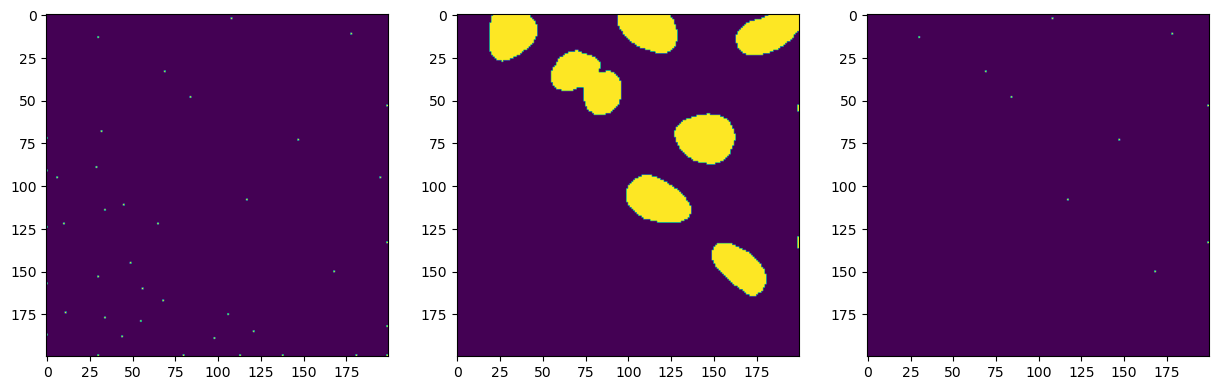

In [29]:
selected_spots = cle.binary_and(binary, detected_spots)

number_of_spots = cle.sum_of_all_pixels(selected_spots)
print("number of selected spots", number_of_spots)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(detected_spots)
axs[1].imshow(binary)
axs[2].imshow(selected_spots)
plt.show()

Next, we separate the image space between the selected spots using a Voronoi diagram which is limited to the positive pixels in the binary image.

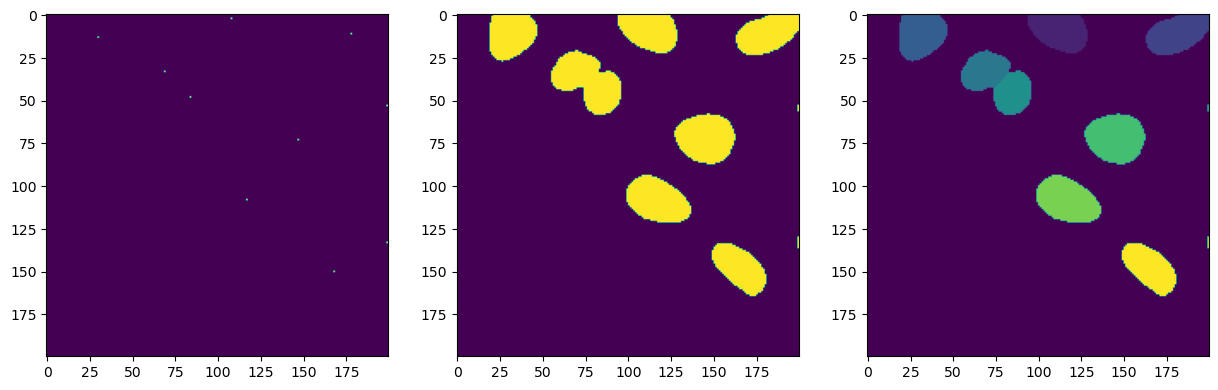

In [31]:
voronoi_diagram = cle.masked_voronoi_labeling(selected_spots, binary)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(selected_spots)
axs[1].imshow(binary)
axs[2].imshow(voronoi_diagram)
plt.show()

In [33]:
pull1 = cle.pull(flip)
pull1 = cle.pull(input_gpu)
pull1 = cle.pull(input_crop)
pull1 = cle.pull(image_to_segment)
pull1 = cle.pull(voronoi_diagram)
pull1 = cle.pull(selected_spots)
pull1 = cle.pull(detected_spots)
pull1 = cle.pull(binary)
pull1 = cle.pull(blurred)
pull1 = cle.pull(segmented)
pull1 = cle.pull(segmented_crop)
pull1 = cle.pull(flipped_img)

## Segmentation with Membranes
Cell segmentation from images showing membranes can be challenging, e.g. as some markers do not mark membranes continously. Thus, some pre-processing needs to be done in order to retrieve optimal segmentation results.

In [2]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

import pyclesperanto as cle

cle.select_device('NVIDIA')

(OpenCL) NVIDIA RTX A4000 (OpenCL 3.0 D3D12 Implementation)
	Vendor:                      Microsoft
	Driver Version:              1.1.0
	Device Type:                 GPU
	Compute Units:               1
	Global Memory Size:          16169 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         1024 MB
	Max Clock Frequency:         12 MHz
	Image Support:               Yes

array([[447, 430, 461, ..., 373, 383, 345],
       [394, 403, 379, ..., 381, 362, 417],
       [393, 459, 400, ..., 388, 409, 360],
       ...,
       [471, 463, 454, ..., 543, 596, 619],
       [510, 511, 463, ..., 624, 626, 551],
       [495, 455, 483, ..., 573, 579, 626]], dtype=uint16, mtype=buffer)
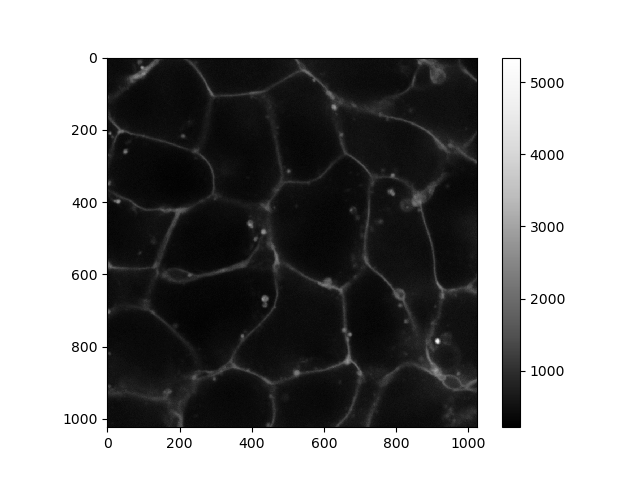
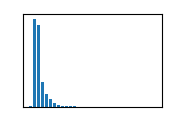

In [24]:
input_image = cle.push(imread("E:/GitHub_Repos/PythonScripts/CLE-Notes/AICS_12_134_C=0.tif"))
input_image[21,:,:]

Thresholding with basic approach

In [ ]:
threshold = 550
binary = input_image < threshold
labels = cle.voronoi_labeling(binary)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(input_image[21,:,:])
axs[1].imshow(binary[21,:,:], cmap='gray')
axs[2].imshow(labels[21,:,:], cmap='prism')
plt.show()

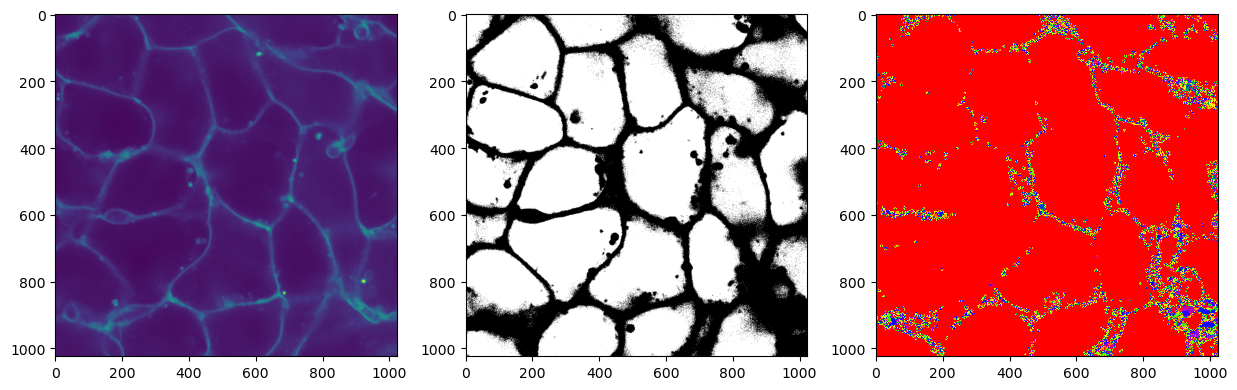

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(input_image[17,:,:])
axs[1].imshow(binary[22,:,:], cmap='gray')
axs[2].imshow(labels[22,:,:], cmap='prism')
plt.show()

Alternatively, with some intermediate correction, e.g. binary opening, we can improve segmentation quality in the binary image before labeling individual objects.

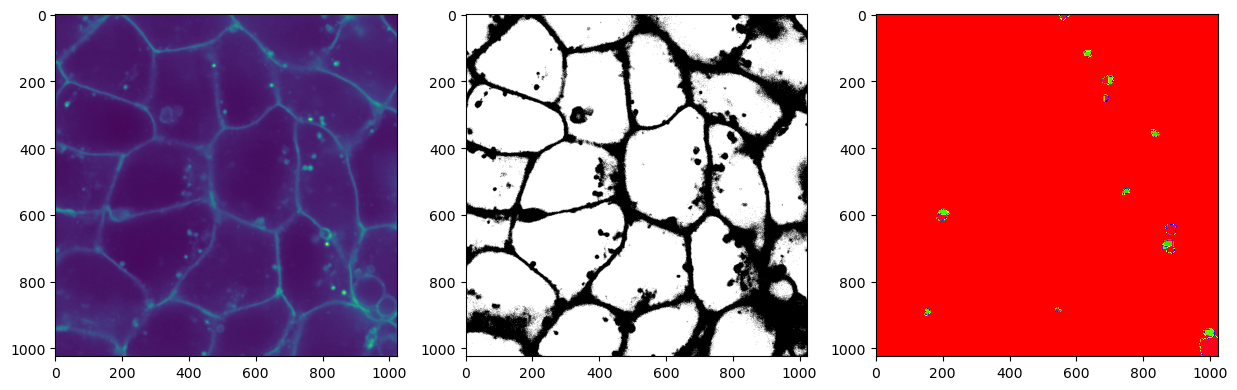

In [11]:
binary = input_image < threshold
# binary opening
corrected_binary = cle.binary_opening(binary, radius_x=2, radius_y=2)
labels = cle.voronoi_labeling(corrected_binary)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(input_image[25,:,:])
axs[1].imshow(binary[25,:,:], cmap='gray')
axs[2].imshow(labels[25,:,:], cmap='prism')
plt.show()

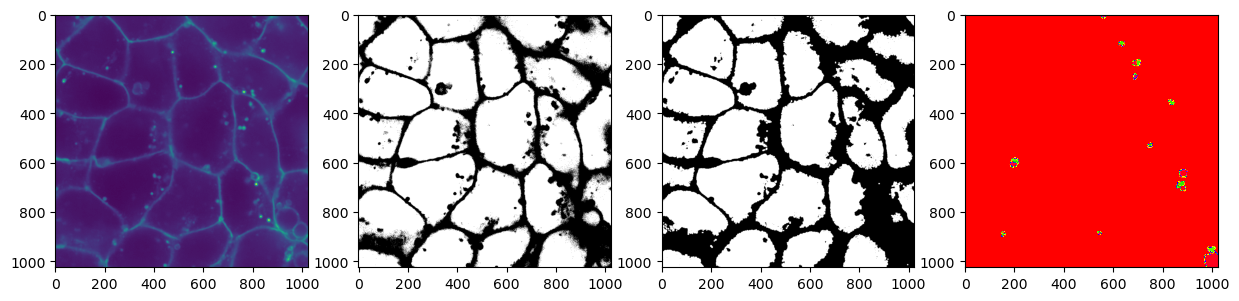

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))
axs[0].imshow(input_image[25,:,:])
axs[1].imshow(binary[25,:,:], cmap='gray')
axs[2].imshow(corrected_binary[25,:,:], cmap='gray')
axs[3].imshow(labels[25,:,:], cmap='prism')
plt.show()